In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
disease = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Good news. No missing data

Split the data into train and test set

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(disease, test_size = 0.2, random_state = 1)

In [5]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.00000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.475207,0.694215,0.979339,131.380165,246.371901,0.14876,0.53719,149.524793,0.318182,1.023140,1.409091,0.727273,2.289256,0.553719
std,9.155719,0.461694,1.024385,17.409520,51.509276,0.35659,0.52397,23.560318,0.466736,1.098264,0.612796,1.006205,0.610258,0.498136
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.00000,0.00000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.00000,0.00000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.00000,1.00000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.00000,1.00000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.00000,2.00000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 62 to 37
Data columns (total 14 columns):
age         242 non-null int64
sex         242 non-null int64
cp          242 non-null int64
trestbps    242 non-null int64
chol        242 non-null int64
fbs         242 non-null int64
restecg     242 non-null int64
thalach     242 non-null int64
exang       242 non-null int64
oldpeak     242 non-null float64
slope       242 non-null int64
ca          242 non-null int64
thal        242 non-null int64
target      242 non-null int64
dtypes: float64(1), int64(13)
memory usage: 28.4 KB


In [7]:
train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1


Check the ratio of petients with and without heart disease to make sure we have balanced data of both groups 

In [8]:
train['target'].value_counts()

1    134
0    108
Name: target, dtype: int64

In [9]:
train['target'].value_counts()[1]/train['target'].value_counts()[0]

1.2407407407407407

There is 24% more data available in group with heart disease compared to one without. This difference in data may or may not cause a problem. Let's come back to this later if we find the algorithms do not perform well

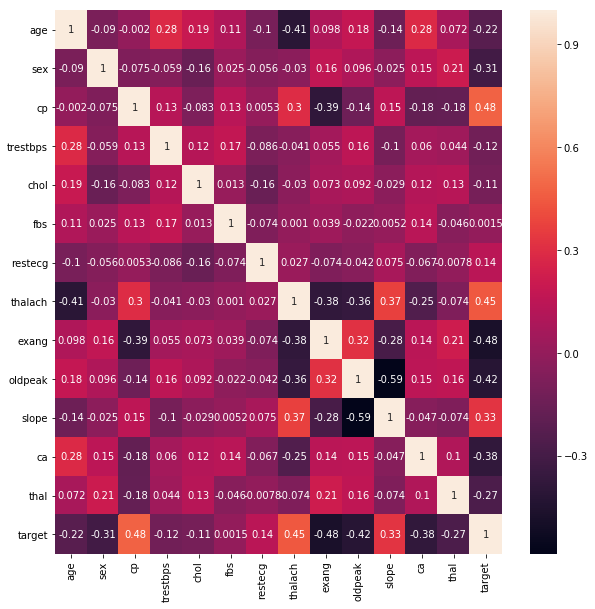

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

From the matrix, cp (chest pain type), thalach (maximum heart rate achieved), exang (exercise induced angina) are the top variables that are mostly correlated to target. The fbs (fasting blood sugar > 120 mg/dl) is the least correlated.

Look at how the age contributes to heart disease

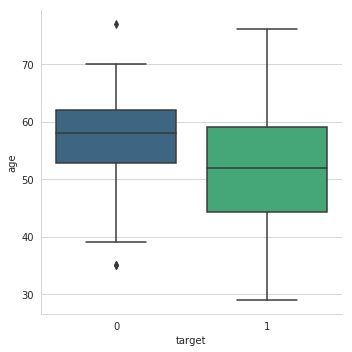

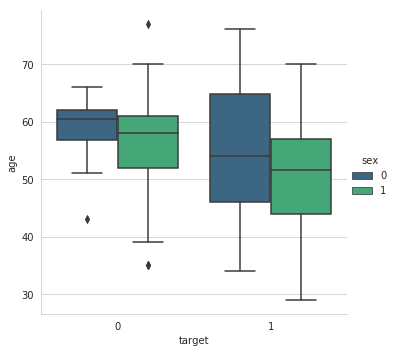

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.catplot('target','age', data=train, kind='box', palette='viridis')
sns.catplot('target','age', data=train, kind='box', hue ='sex', palette='viridis')

From the graph, we observe:
* The mean age of those who get heart disease is around 53 while the mean age of those who do not is around 58 years old. 
* There is a larger range of those who get heart disease compared to those who do not
* Male face risk of heart disease at younger ages than female. This can be due to higher frequency in negative habits of men in early age such as smoking, drinking, or having little sleep

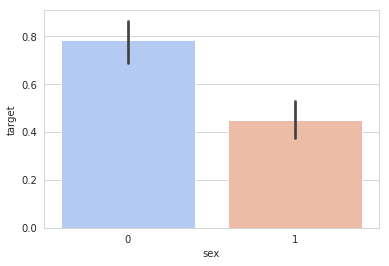

In [12]:
sns.barplot('sex','target',data=train, palette='coolwarm')

However, female has higher rate of heart attack compared to male

In [13]:
sex_compare = train[['sex','target']].groupby('sex').mean()
sex_compare

,target
sex,
0,0.783784
1,0.452381


In [14]:
sex_compare.iloc[0]/sex_compare.iloc[1]

target    1.732575
dtype: float64

In [15]:
sex_count = train['sex'].value_counts()
sex_count

1    168
0     74
Name: sex, dtype: int64

In [16]:
sex_count.iloc[1]/sex_count.iloc[0]

0.44047619047619047

The percentage of those who get heart disease among female is nearly as twice as the percentage of those who get heart disease among male. But the data available of female is nearly half of the data available of male, which can skew the result

Understand about chest pain type by observing its effect to the target

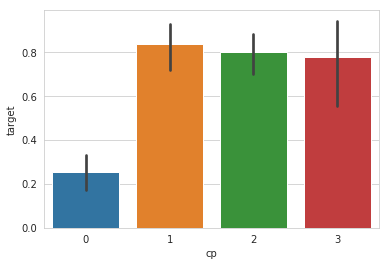

In [17]:
sns.barplot('cp','target',data=train)

It seems like the 0 type is the least severe. There seems not to be any pattern of increase in risk of heart attack compared between types 1, 2, and 3 

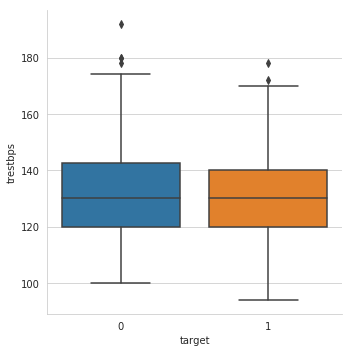

In [18]:
sns.catplot('target','trestbps',data=train, kind='box')

There is little difference in resting blood pressure between 2 groups. This variable seems to be insignificant in predicting heart disease. Maybe cholesterol would be a better predictor?

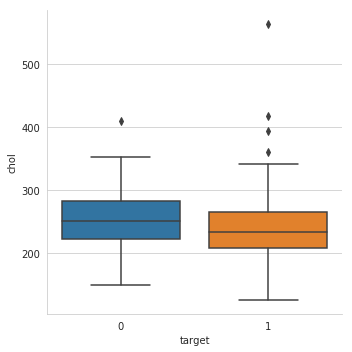

In [19]:
sns.catplot('target','chol',data=train, kind='box')

Interesting, the average of patients without heart disease is higher than those with heart disease. This indicates that high level of serum cholestol is not particularly useful if we not take into the levels of different types of cholesterol.

This time let's see how well the fasting blood sugar predicts the likelihood of heart disease

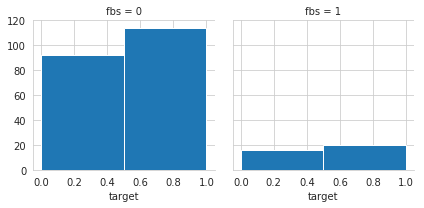

In [20]:
g = sns.FacetGrid(data=train, col = 'fbs')
g.map(plt.hist,'target', bins=2)

Another way that we can see the correlation between these 2 categorical data is to find the difference between them

In [21]:
diff_df = pd.DataFrame(train[['target','fbs']])
diff_df['diff'] = np.abs(diff_df['target']-diff_df['fbs'])
np.sum(diff_df['diff'])/diff_df['diff'].count()


0.5371900826446281

More than half of the data is different. fbs seems not to be a strong indicator either.

Let's visualize resting electrocardiographic results difference to see if we gain some insights

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


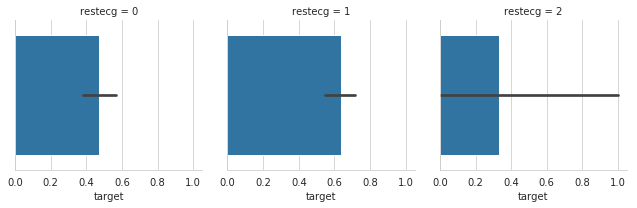

In [22]:
g = sns.FacetGrid(data=train, col = 'restecg')
g.map(sns.barplot,'target')

The patients with restecg of 1 seem to have the highest risk of getting heart disease. However, since there is a large variation in restecg, we cannot conclude that patients with restecg of 2 have less rish of heart disease. 

How about maximum heart rate achieved? How does the rate correlate to the disease? Observe the pattern to find the answer

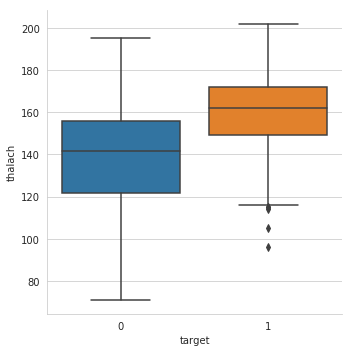

In [23]:
sns.catplot('target','thalach',data=train, kind='box')

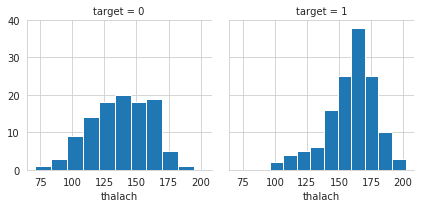

In [24]:
g = sns.FacetGrid(data=train, col = 'target')
g.map(plt.hist,'thalach')

Patients with heart disease seem to have higher maximum heart rate achieved than those who don't. thalach can be a good indicator of the disease

Angina is a type of chest pain caused by reduced blood flow to the heart. We predict that patients without angina should have less risk of getting the disease

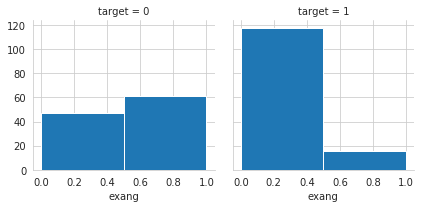

In [25]:
g = sns.FacetGrid(data=train, col = 'target')
g.map(plt.hist,'exang', bins=2)

Althose we do not see the clear correlation when looking the distribution of exercise induced angina of group without disease, we can see the clear correlation between the exercise induced angina and the target. Patients without exercise induced angina has a high risk of getting the disease. This contradicts our initial intuitive guess. 

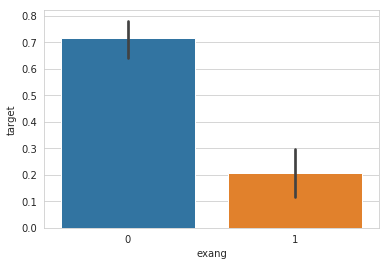

In [26]:
sns.barplot('exang','target',data=train)

This bar graph also indicates the same thing. So our alternative guess is a better claim.

oldpeak is ST depression induced by exercise relative to rest. According to wikipedia, ST depression is often a sign of coronary insufficiency. This sounds like a good feature for prediction 

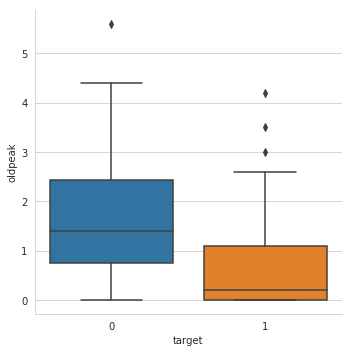

In [27]:
sns.catplot('target','oldpeak',data=train, kind= 'box')

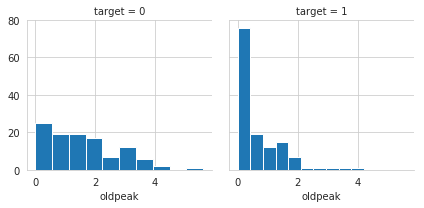

In [28]:
g = sns.FacetGrid(data=train, col = 'target')
g.map(plt.hist,'oldpeak')

There seems to be a tendency that those with lower oldpeak has higher risk of getting heart disease. This seems to be another good indicator.

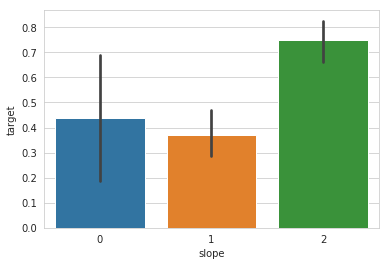

In [29]:
sns.barplot('slope','target',data=train)

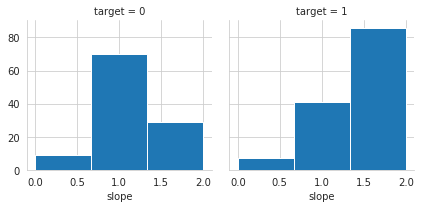

In [30]:
g = sns.FacetGrid(data=train, col = 'target')
g.map(plt.hist,'slope',bins=3)

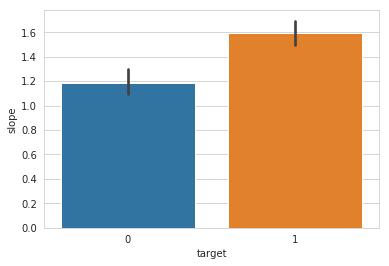

In [31]:
sns.barplot('target','slope',data=train)

From both graph, non-disease patients tend to have slope close to 1 while the patients with heart disease have the slope close to 2

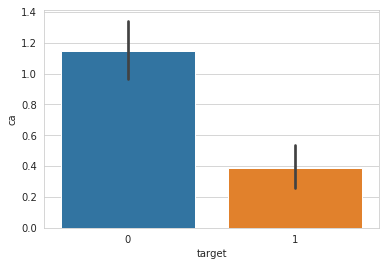

In [32]:
sns.barplot('target','ca',data=train)

Now we investigate ca: number of major vessels (0-3) colored by flourosopy

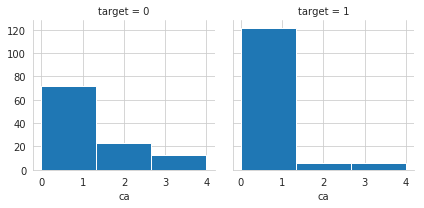

In [33]:
g = sns.FacetGrid(data=train, col = 'target')
g.map(plt.hist,'ca',bins=3)

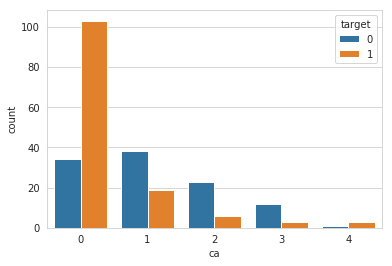

In [34]:
sns.countplot('ca',data=train, hue='target')

Since there is less data available for ca >=1, we cannot understand well how these numbers contribute to the prediction. But looking at ca 0, the more than double number of patients who have heart disease compared to those who don't. This result can be retionalized that those who have less major vessels are more likely to have heart disease

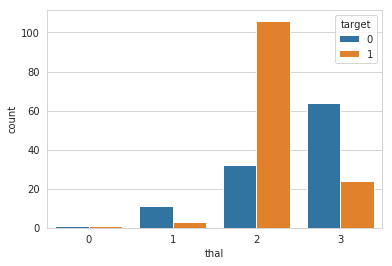

In [35]:
sns.countplot('thal',data=train, hue='target')

In [36]:
X_train = train.drop(['target','fbs'],axis=1)
y_train = train['target']

X_test = train.drop(['target','fbs'],axis=1)
y_test = train['target']

In [37]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state=1)
sgd_model.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_model, X_train, y_train).mean()

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6118827160493827

Evaluate the perfomance using Confusion Matrix

In [39]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

sgd_predictions = cross_val_predict(sgd_model, X_train, y_train)
confusion_matrix(y_train, sgd_predictions)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([[87, 21],
       [73, 61]])

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_train, sgd_predictions))

              precision    recall  f1-score   support

           0       0.54      0.81      0.65       108
           1       0.74      0.46      0.56       134

    accuracy                           0.61       242
   macro avg       0.64      0.63      0.61       242
weighted avg       0.65      0.61      0.60       242



This is not a bad precision score. But low recall_score. This indicates we have larger number of false negative (predict 0 while the target is 1) compared to the false positive ((predict 1 while the target is 0). Since we want the patients who have heart disease to be diagnosed with heart disease, we may want to find a better algorithm to improve our recall score. 

We try with Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=1)
forest_predictions = cross_val_predict(forest_clf, X_train, y_train )
print(classification_report(y_train, forest_predictions))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.79      0.82      0.81       108
           1       0.85      0.83      0.84       134

    accuracy                           0.83       242
   macro avg       0.82      0.83      0.82       242
weighted avg       0.83      0.83      0.83       242



/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Much better result with random forest classifier. Both the precision and recall improves and they are nearly equally equal. 